## Finite sample SFS calculation and plots

In [ ]:
from scipy.special import erfinv
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
import numpy as np
import sys
import math
sys.path.insert(1,'numerics_snakemake')
from plot_sfs import *
from matplotlib import pyplot as plt
from power_v2 import *
from plot_expseg import *

### Derivation of finite SFS

Assuming that the samples are taken independently from the population with replacement, the number of copies of the deleterious allele in a finite sample of size $n$ is the sum of $n$ Bernoulli trials with probability of success $P$:
$$\xi_k^{(n)}={n\choose k}P^k(1-P)^k$$

Alternatively, we can write:
$$\xi^{(n)}\sim\text{Binom}(n,P)$$

For large $n$ and small $P$, we can approximate this distribution as Poisson:
$$\xi^{(n)}\sim\text{Pois}(nP)$$

We have previously shown that $$P\sim\text{Gamma}(\alpha,\beta)$$

The expected value of the $k$-th entry in the SFS is then given by:
\begin{align}
\mathbb{E}\left[\text{Pr}\left(\xi_k^{(n)}\right)\right]&=\mathbb{E}\left[\frac{(nP)^ke^{-nP}}{k!}\right]\\
&=\frac{n^k}{k!}\int_0^\infty P^ke^{-nP}\frac{\beta^\alpha}{\Gamma(\alpha)}P^{\alpha-1}e^{-\beta P}dP\\
&=\frac{n^k\beta^\alpha}{k!\Gamma(\alpha)}\int_0^\infty P^{k+\alpha-1}e^{-(n+\beta)P}dP\\
&=\frac{n^k\beta^\alpha}{k!\Gamma(\alpha)}\int_0^\infty \left(\frac{z}{n+\beta}\right)^{(k+\alpha-1}e^{-z}\frac{1}{n+\beta}dz\\
&=\frac{n^k\beta^\alpha}{k!\Gamma(\alpha)}(n+\beta)^{-(k+\alpha)}\int_0^\infty z^{k+\alpha-1}e^{-z}dz\\
&=\frac{n^k\beta^\alpha\Gamma(k+\alpha)}{k!(n+\beta)^{k+\alpha}\Gamma(\alpha)}
\end{align}\\


### Plots

In [2]:
# load data
data = pd.read_csv("numerics_snakemake/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("numerics_snakemake/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

sigma_vals = data['sigma'].tolist()
kappa_list = data['u2_GQ'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [3]:
def finite_sfs_k(n,k,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-8,N=10000,D=1,d=2):
    beta = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    alpha = shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    num=(n**k)*(beta**alpha)*special.gamma(alpha+k)
    denom=math.factorial(k)*((n+beta)**(k+alpha))*special.gamma(alpha)
    return(num/denom)

In [4]:
nval=1e6
sg=0.1
sval=0.01
kmax=40

sg_vals = [0.1,10,100]
sfs_sg0 = [finite_sfs_k(nval,k,sg_vals[0],sval,sigma_vals,pole_vals,res_vals) for k in range(kmax)]
sfs_sg1 = [finite_sfs_k(nval,k,sg_vals[1],sval,sigma_vals,pole_vals,res_vals) for k in range(kmax)]
sfs_sg2 = [finite_sfs_k(nval,k,sg_vals[2],sval,sigma_vals,pole_vals,res_vals) for k in range(kmax)]


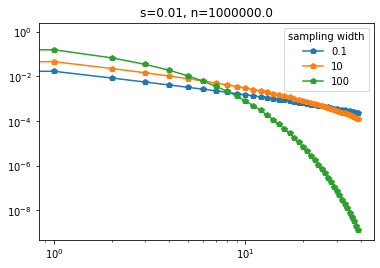

In [5]:
def exp_seg(sigma,s,sigma_vals,res_vals,pole_vals,n=1e6,Nval=10000,d=2):
    beta = rate_p(sigma,s,sigma_vals,pole_vals,N=Nval,d=d)
    alpha = shape_p(sigma,s,sigma_vals,res_vals,N=Nval,d=d)
    print(alpha)
    exp_val = 1-((1+(n/beta))**(-1*alpha))
#     print(((1+(n/beta))**(-1*alpha)))
    return(exp_val)


fig,ax = plt.subplots()
ax.plot(range(kmax),sfs_sg0,label=str(sg_vals[0]),marker='p')
ax.plot(range(kmax),sfs_sg1,label=str(sg_vals[1]),marker='p')
ax.plot(range(kmax),sfs_sg2,label=str(sg_vals[2]),marker='p')
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend(title="sampling width")
plt.title("s="+str(sval)+", n="+str(nval))
plt.savefig("finite_sfs.png")

### Conditioned allele frequency

In [7]:
sigma=0.1
s=0.01
N=10000
D=1
d=2
mu=1e-8
rate = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
shape = shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
seg_prob = 1-((1+(nval/rate))**(-1*shape))

0.15891602788227024
0.15900173565044717
0.15909579982021455
0.15919903513041136
0.15931233575590764
0.1594366830525194
0.15957315405704323
0.1597229308160337
0.1598873106241253
0.16006771726057784
0.1602657133213712
0.16048301375366447
0.1607215007098474
0.16098323984984436
0.16127049823287226
0.1615857639536229
0.161931767692949
0.16231150636971536
0.16272826909867644
0.16318566567921475
0.16368765786169626
0.1642385936622569
0.1648432450232381
0.1655068491454687
0.1662351538503929
0.16703446736494995
0.16791171296041826
0.16887448891847892
0.16993113434389692
0.17109080139385702
0.17236353454957123
0.17376035761676967
0.17529336920863217
0.17697584753818782
0.17882236542784397
0.18084891653220242
0.1830730538674444
0.18551404184715947
0.1881930231414802
0.19094719026338441
0.19377692595728402
0.19666557645838376
0.19959794069394213
0.20261080280129506
0.20566522582305624
0.20880162141007064
0.21202351315506932
0.2153514544868701
0.21878852077598054
0.2223525539857338
0.22604809110384

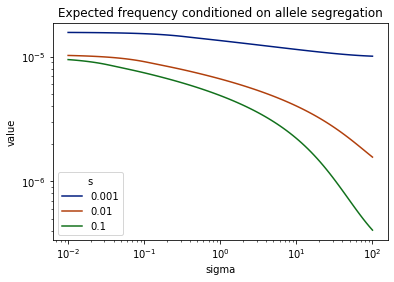

In [8]:
sigma_list = np.logspace(-2, 2, 100)
colors = sns.color_palette("dark", 3)
fig,ax = plt.subplots()
n_ax = 1e7
s_vals = [0.001,0.01,0.1]
ax.plot(sigma_list,
                  [(mu/s_vals[0])/exp_seg(sg, s_vals[0], sigma_vals, res_vals, pole_vals, n=n_ax) for sg in sigma_list],
                  color=colors[0])
ax.plot(sigma_list,
                  [(mu/s_vals[1])/exp_seg(sg, s_vals[1], sigma_vals, res_vals, pole_vals, n=n_ax) for sg in sigma_list],
                  color=colors[1])
ax.plot(sigma_list,
                  [(mu/s_vals[2])/exp_seg(sg, s_vals[2], sigma_vals, res_vals, pole_vals, n=n_ax) for sg in sigma_list],
                  color=colors[2])
ax.legend(labels=[str(sv) for sv in s_vals],title="s")
ax.set_title("Expected frequency conditioned on allele segregation")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("sigma")
ax.set_ylabel("value")
plt.show()